1. overview: K mean, K mean++ with default seed and fixed seed , Hierarchical clustering are implemented in this code file. 
2. Mall Customer dataset is used for Hierarchical clustering, and a RGB image along with a synthetic data are used for k mean and k mean ++. 

In [81]:
import sklearn 
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from mpl_toolkits import mplot3d
from sklearn.metrics import pairwise_distances_argmin

In [82]:
from PIL import Image
from IPython.display import display

# K-mean Tree #

**Generate synthetic Data**

In [172]:
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.6,random_state=4)

**Plot the dataset**

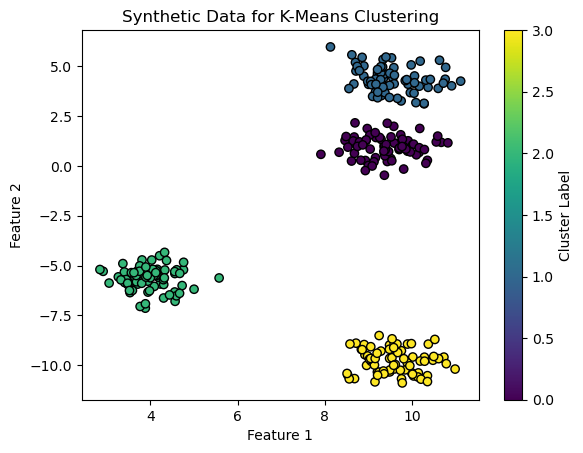

In [173]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Synthetic Data for K-Means Clustering")
plt.colorbar(label="Cluster Label")
plt.show()

In [174]:
image = Image.open("cropped.jpg")  
image = image.convert("RGB")

In [175]:
image_array = np.array(image)
w, h, d = image_array.shape
pixels = image_array.reshape(-1, 3)

**Implement the K-Mean**

In [176]:
def k_means(X, k, max_iters=100,seed=None):
    if seed is not None:
        np.random.seed(seed)
    
    n_samples, n_features = X.shape
    centroids = X[np.random.choice(n_samples, k, replace=False)]
    
    for _ in range(max_iters):
        labels = pairwise_distances_argmin(X, centroids)
        
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    return labels, centroids

**Fit the data**

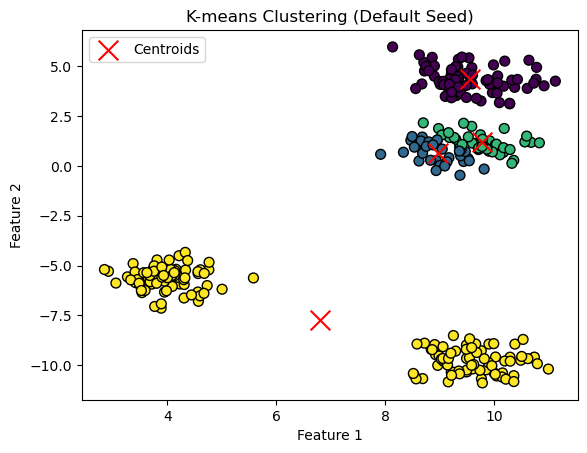

In [177]:
k = 4
labels, centroids = k_means(X, k)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, edgecolor='k')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.title("K-means Clustering (Default Seed)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

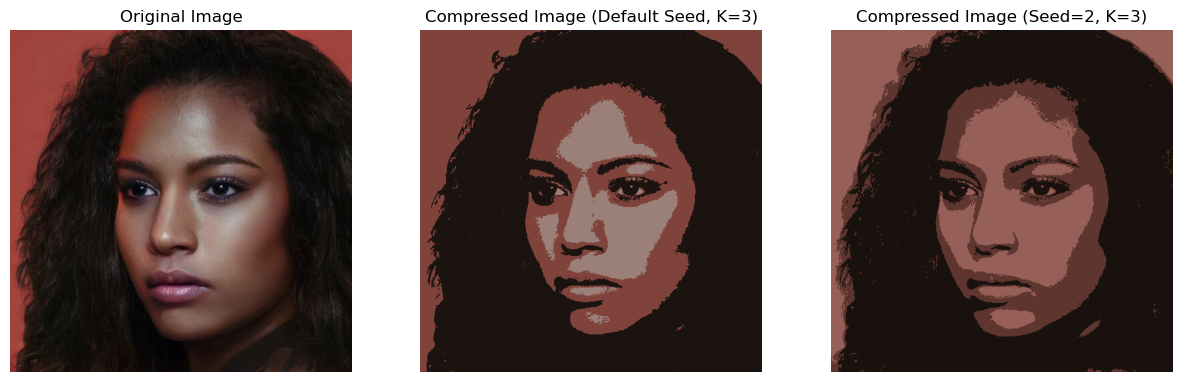

In [180]:
K = 3
labels_default, centroids_default = k_means(pixels, K)  
labels_seed2, centroids_seed2 = k_means(pixels, K, seed=2)
compressed_default = centroids_default[labels_default].astype(np.uint8).reshape(w, h, 3)
compressed_seed2 = centroids_seed2[labels_seed2].astype(np.uint8).reshape(w, h, 3)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(image)
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(compressed_default)
ax[1].set_title(f"Compressed Image (Default Seed, K={K})")
ax[1].axis("off")

ax[2].imshow(compressed_seed2)
ax[2].set_title(f"Compressed Image (Seed=2, K={K})")
ax[2].axis("off")

plt.show()

**Fit on seed = 2 on dataset （image with seed = 2 is above）**

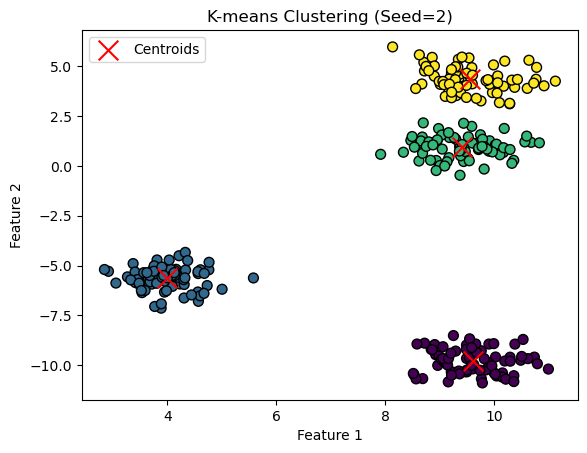

In [178]:
k = 4
labels, centroids = k_means(X, k, seed=2)   
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, edgecolor='k')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.title("K-means Clustering (Seed=2)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

**K mean ++**

In [184]:
def k_means_plus_init(X,k,seed):
    if seed is not None:
        np.random.seed(seed)
        
    n_samples, n_features = X.shape
    centroids = np.zeros((k, n_features))
        
    centroids[0] = X[np.random.choice(n_samples, 1)]
    for i in range(1,k):
        min_distances = np.array([min([np.linalg.norm(x - c) ** 2 for c in centroids[:i]]) for x in X])
        probabilities = min_distances / np.sum(min_distances)
        centroids[i] = X[np.random.choice(n_samples, p=probabilities)]
    return centroids

In [185]:
def k_means_plusplus(X, k, max_iters=100,seed=None):
    n_samples, n_features = X.shape
    centroids = k_means_plus_init(X,k,seed)
    for _ in range(max_iters):
        labels = pairwise_distances_argmin(X, centroids)
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return labels, centroids

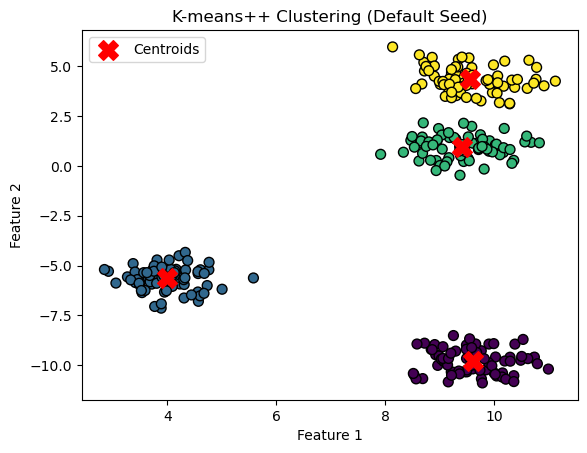

In [95]:
k = 4
labels, centroids = k_means_plusplus(X,k)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, edgecolor='k')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title("K-means++ Clustering (Default Seed)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

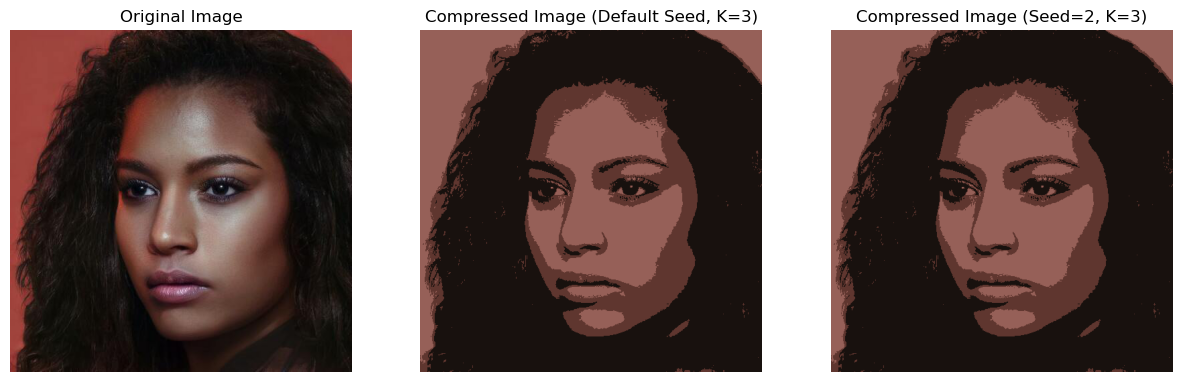

In [188]:
K = 3
labels_default, centroids_default = k_means_plusplus(pixels, K)  
labels_seed2, centroids_seed2 = k_means_plusplus(pixels, K, seed=2)
compressed_default = centroids_default[labels_default].astype(np.uint8).reshape(w, h, 3)
compressed_seed2 = centroids_seed2[labels_seed2].astype(np.uint8).reshape(w, h, 3)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(image)
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(compressed_default)
ax[1].set_title(f"Compressed Image (Default Seed, K={K})")
ax[1].axis("off")

ax[2].imshow(compressed_seed2)
ax[2].set_title(f"Compressed Image (Seed=2, K={K})")
ax[2].axis("off")

plt.show()

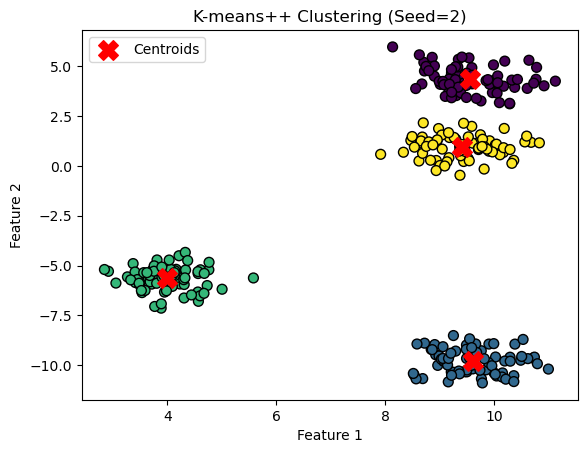

In [97]:
k = 4
labels, centroids = k_means_plusplus(X, k, seed=2)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, edgecolor='k')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title("K-means++ Clustering (Seed=2)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

The result from default seed k-mean performs badly with the clustering changing everytime I run it. However the rest are stable 
with same clustering everytime and the precision is good. 

**Hierachy tree**

**data initialization**

In [125]:
from scipy.cluster.hierarchy import dendrogram

In [133]:
df = pd.read_csv('Mall_Customers.csv')
with pd.option_context('future.no_silent_downcasting', True):
    df["Gender"] = df["Gender"].replace(to_replace=['Male', 'Female'], value=[-1, 1]).infer_objects() 
df = df.drop('CustomerID', axis=1)
X = df.values

**Implement tree**

In [142]:
hierarchy = {i: np.array([point]) for i, point in enumerate(X)}  
cluster_list = list(hierarchy.keys())  
dendro_matrix = []  
next_cluster_id = len(hierarchy) 

In [143]:
def calculate_ward_distance(cluster1, cluster2):
    n1 = len(cluster1)
    n2 = len(cluster2)
    mean1 = np.mean(cluster1, axis=0)
    mean2 = np.mean(cluster2, axis=0)
    return np.sqrt((2.0 * n1 * n2) / (n1 + n2)) * np.linalg.norm(mean1 - mean2)

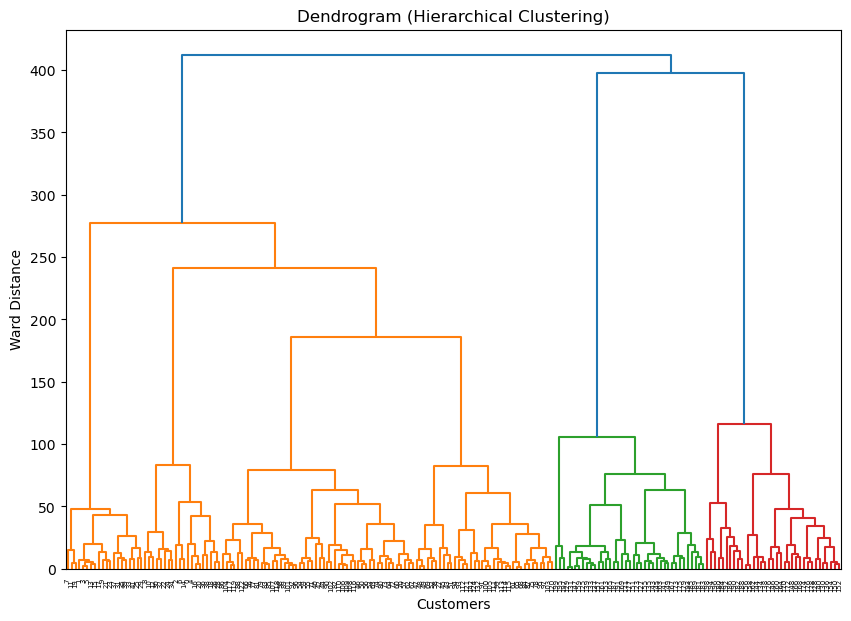

In [144]:
while len(cluster_list) > 1:
    min_dist = float('inf')
    pair = (-1, -1)

    for i in cluster_list:
        for j in cluster_list:
            if i < j: 
                distance = calculate_ward_distance(hierarchy[i], hierarchy[j])
                if distance < min_dist:
                    min_dist = distance
                    pair = (i, j)

    i, j = pair
    new_cluster = np.vstack((hierarchy[i], hierarchy[j]))
    cluster_list.remove(i)
    cluster_list.remove(j)
    cluster_list.append(next_cluster_id) 

    dendro_matrix.append([i, j, min_dist, len(new_cluster)])

    hierarchy[next_cluster_id] = new_cluster
    next_cluster_id += 1 
    
dendro_matrix = np.array(dendro_matrix, dtype=float)
plt.figure(figsize=(10, 7))
dendrogram(dendro_matrix)
plt.title('Dendrogram (Hierarchical Clustering)')
plt.xlabel('Customers')
plt.ylabel('Ward Distance')
plt.show()